In [90]:
%pylab
%matplotlib inline
import matplotlib.pyplot as plt

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


/Users/marika/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os.path
import scipy as sp
import scipy.stats as stats
import statsmodels as smr
import statsmodels.stats.api as sms
import statsmodels.api as sm
import statsmodels.formula.api as smf
scipy.stats.chisqprob = lambda chisq, df: scipy.stats.chi2.sf(chisq, df)

In [118]:
all_data = pd.read_csv('./all_data.csv')

In [119]:
all_data.shape

(676, 21)

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
train_data, test_data = train_test_split(df,test_size = 0.2)

In [122]:
train_data.to_csv('./train_data.csv')
test_data.to_csv('./test_data.csv')

In [116]:
df = train_data

In [117]:
df

,Student,Year,Result,PersonSatisf_Mean,PersonSatisf_Variance,RecSatisf_Mean,RecSatisf_Variance,PPI_Init_Mean,PPI_Init_Variance,PPI_Infor_Mean,...,PPI_Close_Mean,PPI_Close_Variance,PE_Hand_Mean,PE_Hand_Variance,PE_Mod_Mean,PE_Mod_Variance,PE_Check_Mean,PE_Check_Variance,Hx_Mean,Hx_Variance
220,496168,2010.0,1,0.6875,NaN,0.625000,NaN,0.701977,NaN,0.538571,...,0.628000,NaN,1.000000,NaN,0.750000,NaN,0.688525,NaN,0.781513,NaN
473,997377,2012.0,1,0.7750,NaN,0.725000,NaN,0.842667,NaN,0.777143,...,0.706667,NaN,0.125000,NaN,1.000000,NaN,0.799107,NaN,0.779853,NaN
463,792281,2012.0,1,0.5625,NaN,0.475000,NaN,0.746667,NaN,0.700000,...,0.753333,NaN,0.500000,NaN,0.750000,NaN,0.557093,NaN,0.702491,NaN
144,464314,2009.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728,366800,2014.0,1,0.4750,NaN,0.575000,NaN,0.863000,NaN,0.848571,...,0.803810,NaN,0.750000,NaN,0.875000,NaN,0.523438,NaN,0.600711,NaN
31,934998,2008.0,1,0.9000,NaN,0.891667,NaN,1.000000,NaN,0.971831,...,0.838710,NaN,0.888889,NaN,0.888889,NaN,0.465909,NaN,0.809091,NaN
540,321395,2012.0,1,0.4375,NaN,0.350000,NaN,0.713778,NaN,0.660000,...,0.516667,NaN,0.875000,NaN,0.687500,NaN,0.545139,NaN,0.780965,NaN
748,716257,2014.0,1,0.8000,NaN,0.900000,NaN,0.946000,NaN,0.931429,...,0.871905,NaN,0.562500,NaN,0.875000,NaN,0.596503,NaN,0.725229,NaN
582,374550,2013.0,1,0.7375,NaN,0.775000,NaN,0.917000,NaN,0.891429,...,0.883810,NaN,0.812500,NaN,0.625000,NaN,0.640040,NaN,0.700925,NaN
422,960111,2011.0,1,0.7000,NaN,0.675000,NaN,0.611628,NaN,0.637143,...,0.477000,NaN,0.625000,NaN,1.000000,NaN,0.655738,NaN,0.669492,NaN


In [68]:
df.corr()['Result']

Student                 -0.044547
Year                     0.011212
Result                   1.000000
PersonSatisf_Mean        0.244235
PersonSatisf_Variance   -0.138453
RecSatisf_Mean           0.207295
RecSatisf_Variance      -0.096333
PPI_Init_Mean            0.067137
PPI_Init_Variance       -0.123416
PPI_Infor_Mean           0.069753
PPI_Infor_Variance      -0.103760
PPI_Close_Mean           0.138058
PPI_Close_Variance      -0.091468
PE_Hand_Mean             0.038573
PE_Hand_Variance         0.065534
PE_Mod_Mean              0.036220
PE_Mod_Variance         -0.047215
PE_Check_Mean            0.082960
PE_Check_Variance        0.008122
Hx_Mean                  0.123976
Hx_Variance             -0.007608
Name: Result, dtype: float64

In [69]:
mean_features = set()
variance_features = set()

In [70]:
single_features = []

In [71]:
for i in range(len(df.columns)):
    if 'Mean' in df.columns[i]:
        mean_features.add(df.columns[i])
        single_features.append(df.columns[i])        
    if 'Variance' in df.columns[i]:
        variance_features.add(df.columns[i])
        single_features.append(df.columns[i])

In [72]:
features = set(mean_features).union(set(variance_features))

In [33]:
#single_features = list(features)

In [73]:
for i in range(len(single_features)):
    print (single_features[i])
    print (smf.logit('Result ~ ' + str(single_features[i]), data=df).fit().summary())

PersonSatisf_Mean
Optimization terminated successfully.
         Current function value: 0.075617
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                  432
Model:                          Logit   Df Residuals:                      430
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 May 2018   Pseudo R-squ.:                  0.2533
Time:                        15:46:07   Log-Likelihood:                -32.667
converged:                       True   LL-Null:                       -43.746
                                        LLR p-value:                 2.509e-06
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.6329      1.351     -1.949      0.051      -5.281   

PPI_Close_Variance
Optimization terminated successfully.
         Current function value: 0.097501
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                  432
Model:                          Logit   Df Residuals:                      430
Method:                           MLE   Df Model:                            1
Date:                Fri, 04 May 2018   Pseudo R-squ.:                 0.03717
Time:                        15:46:08   Log-Likelihood:                -42.120
converged:                       True   LL-Null:                       -43.746
                                        LLR p-value:                   0.07134
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.7612      0.680      7.002      0.000       3.42

In [74]:
smf.logit('Result ~ ' + ('+'.join(mean_features)), data=df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.072009
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                  432
Model:                          Logit   Df Residuals:                      422
Method:                           MLE   Df Model:                            9
Date:                Fri, 04 May 2018   Pseudo R-squ.:                  0.2889
Time:                        15:51:37   Log-Likelihood:                -31.108
converged:                       True   LL-Null:                       -43.746
                                        LLR p-value:                  0.002679
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.8967      4.169     -0.935      0.350     -12.067       4.274
PE_Hand_Mean         -0.6858      1.669     -0.411      0.681      -3.957       2.586
PE_Mod_Mean           0.1046      2.045      0.051      0.959      -3.904       4.114
PPI_Init_Mean        -8.5376      7.212     -1.184      0.237     -22.673       5.598
RecSatisf_Mean       -4.8233      6.465     -0.746      0.456     -17.495       7.848
PE_Check_Mean        -3.7672      3.887     -0.969      0.332     -11.385       3.850
PersonSatisf_Mean    16.7631      6.459      2.595      0.009       4.104      29.422
Hx_Mean               3.8542      5.855      0.658      0.510      -7.621      15.330
PPI_Close_Mean        3.6180      4.830      0.749      0.454      -5.849      13.085
PPI_Infor_Mean        6.1061      7.839      0.779      0.436      -9.259      21.471
=====================================================================================
"""

In [75]:
smf.logit('Result ~ ' + ('+'.join(variance_features)), data=df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.069050
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                  432
Model:                          Logit   Df Residuals:                      422
Method:                           MLE   Df Model:                            9
Date:                Fri, 04 May 2018   Pseudo R-squ.:                  0.3181
Time:                        15:51:45   Log-Likelihood:                -29.830
converged:                       True   LL-Null:                       -43.746
                                        LLR p-value:                  0.001017
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 6.1080      1.419      4.305      0.000       3.327       8.889
RecSatisf_Variance        6.3567     20.409      0.311      0.755     -33.644      46.358
Hx_Variance              13.1738     14.888      0.885      0.376     -16.007      42.354
PE_Check_Variance        18.0791     11.067      1.634      0.102      -3.611      39.769
PersonSatisf_Variance   -30.4686     23.159     -1.316      0.188     -75.859      14.922
PE_Hand_Variance         11.7745      5.326      2.211      0.027       1.337      22.212
PPI_Close_Variance      -22.3436     10.962     -2.038      0.042     -43.829      -0.858
PPI_Init_Variance       -11.2991     13.740     -0.822      0.411     -38.229      15.631
PE_Mod_Variance          -6.4784      5.174     -1.252      0.211     -16.620       3.663
PPI_Infor_Variance      -27.3634     20.298     -1.348      0.178     -67.147      12.420
=========================================================================================
"""

In [76]:
smf.logit('Result ~ ' + ('+'.join(features)), data=df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.053595
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                  432
Model:                          Logit   Df Residuals:                      413
Method:                           MLE   Df Model:                           18
Date:                Fri, 04 May 2018   Pseudo R-squ.:                  0.4707
Time:                        15:51:50   Log-Likelihood:                -23.153
converged:                       True   LL-Null:                       -43.746
                                        LLR p-value:                  0.001435
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -8.3720     11.375     -0.736      0.462     -30.666      13.922
RecSatisf_Variance        8.6514     24.729      0.350      0.726     -39.816      57.119
PE_Hand_Mean              1.2248      1.979      0.619      0.536      -2.654       5.104
PE_Mod_Mean              -6.1881      7.048     -0.878      0.380     -20.001       7.625
PPI_Init_Mean           -22.4894     20.023     -1.123      0.261     -61.734      16.756
Hx_Variance              45.6460     28.621      1.595      0.111     -10.450     101.742
RecSatisf_Mean            3.0252     10.317      0.293      0.769     -17.196      23.247
PE_Check_Variance       -11.6890     20.232     -0.578      0.563     -51.343      27.965
PersonSatisf_Variance   -27.6698     27.826     -0.994      0.320     -82.208      26.868
PE_Hand_Variance         12.7339      7.118      1.789      0.074      -1.218      26.686
PE_Check_Mean            -3.7901      4.949     -0.766      0.444     -13.489       5.909
PersonSatisf_Mean         7.1589     10.017      0.715      0.475     -12.475      26.793
Hx_Mean                  18.9667     13.013      1.458      0.145      -6.537      44.471
PPI_Init_Variance       -24.9808     32.061     -0.779      0.436     -87.819      37.857
PPI_Close_Variance      -36.5974     31.232     -1.172      0.241     -97.811      24.616
PE_Mod_Variance         -14.6387     13.563     -1.079      0.280     -41.221      11.943
PPI_Close_Mean           -4.3335     11.539     -0.376      0.707     -26.949      18.282
PPI_Infor_Mean           29.2245     21.128      1.383      0.167     -12.186      70.635
PPI_Infor_Variance       19.0476     41.831      0.455      0.649     -62.939     101.034
=========================================================================================

Possibly complete quasi-separation: A fraction 0.19 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [77]:
def fitmodel(S,data):
    return smf.logit('Result ~ '+('+'.join(S) if len(S)>0 else '1'), data=data).fit()

In [78]:
Sfwd = set()
while len(Sfwd)<len(features):
    f = min(features - Sfwd, key = lambda f: fitmodel(Sfwd.union({f}),df).aic)
    after = fitmodel(Sfwd.union({f}),df).aic
    before = fitmodel(Sfwd,df).aic
    if after < before:
        Sfwd = Sfwd.union({f})
    else:
        break
print Sfwd

Optimization terminated successfully.
         Current function value: 0.097563
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.100547
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.100653
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.099237
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.101236
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.082555
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.101232
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.093766
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.098992
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.097934
  

In [79]:
Sbwd = set(features)
while len(Sbwd)>0:
    f = min(Sbwd, key = lambda f: fitmodel(Sbwd-{f},df).aic)
    after = fitmodel(Sbwd-{f},df).aic
    before = fitmodel(Sbwd,df).aic
    if after < before:
        Sbwd = Sbwd-{f}
    else:
        break
print Sbwd

Optimization terminated successfully.
         Current function value: 0.054317
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.054938
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.055182
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.053989
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.054775
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.057995
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.054205
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.056293
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.053760
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

         Iterations 11
Optimization terminated successfully.
         Current function value: 0.058335
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.054358
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.054112
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.054752
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.055244
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.056883
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.061627
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.057026
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.059065
         Iterations 10
Optimization terminated successfully.
         Cur

Optimization terminated successfully.
         Current function value: 0.059565
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.066155
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.065556
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.065646
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.066769
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.072488
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.063262
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.063262
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.061325
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

In [80]:
smf.logit('Result ~ ' + ('+'.join(Sfwd)), data=df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.067132
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                  432
Model:                          Logit   Df Residuals:                      428
Method:                           MLE   Df Model:                            3
Date:                Fri, 04 May 2018   Pseudo R-squ.:                  0.3371
Time:                        15:52:09   Log-Likelihood:                -29.001
converged:                       True   LL-Null:                       -43.746
                                        LLR p-value:                 1.766e-06
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.4527      1.652     -1.485      0.138      -5.690       0.785
PersonSatisf_Mean        12.1223      2.973      4.078      0.000       6.296      17.948
PersonSatisf_Variance   -23.1125     11.827     -1.954      0.051     -46.293       0.068
PE_Hand_Variance          7.8373      4.161      1.883      0.060      -0.319      15.993
=========================================================================================
"""

In [81]:
smf.logit('Result ~ ' + ('+'.join(Sbwd)), data=df).fit().summary()

Optimization terminated successfully.
         Current function value: 0.063262
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                  432
Model:                          Logit   Df Residuals:                      426
Method:                           MLE   Df Model:                            5
Date:                Fri, 04 May 2018   Pseudo R-squ.:                  0.3753
Time:                        15:52:17   Log-Likelihood:                -27.329
converged:                       True   LL-Null:                       -43.746
                                        LLR p-value:                 4.060e-06
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -1.8113      1.837     -0.986      0.324      -5.412       1.790
PPI_Close_Variance      -16.0137      9.310     -1.720      0.085     -34.261       2.234
Hx_Variance              13.1182      8.781      1.494      0.135      -4.091      30.328
PersonSatisf_Mean        11.3500      3.060      3.710      0.000       5.353      17.347
PersonSatisf_Variance   -24.3839     12.884     -1.893      0.058     -49.635       0.867
PE_Hand_Variance          9.1994      4.949      1.859      0.063      -0.499      18.898
=========================================================================================
"""

In [87]:
single_features[1]

'PersonSatisf_Variance'

PersonSatisf_Mean


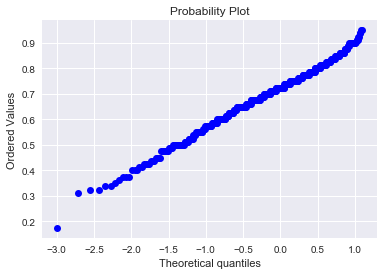

PersonSatisf_Variance


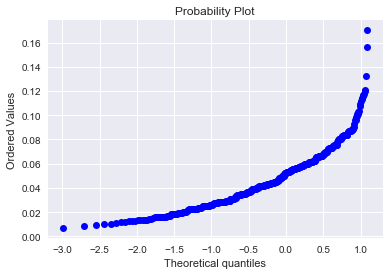

RecSatisf_Mean


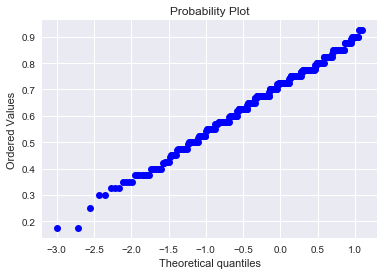

RecSatisf_Variance


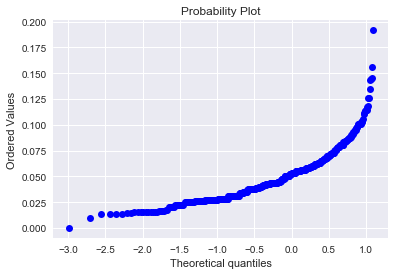

PPI_Init_Mean


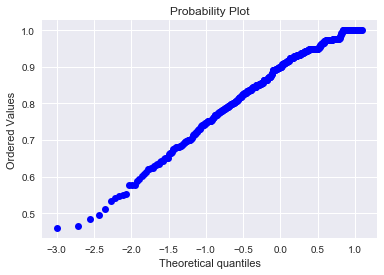

PPI_Init_Variance


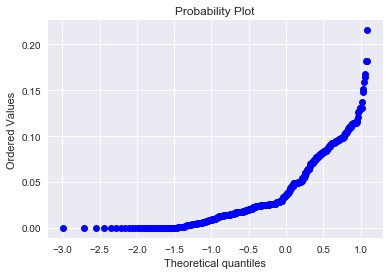

PPI_Infor_Mean


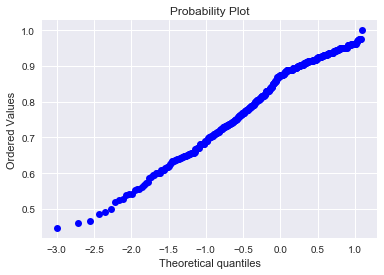

PPI_Infor_Variance


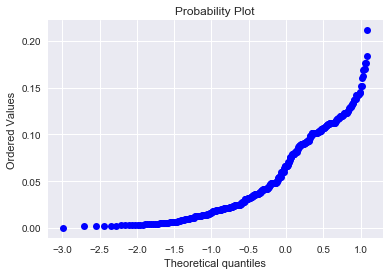

PPI_Close_Mean


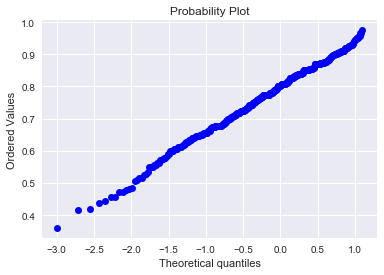

PPI_Close_Variance


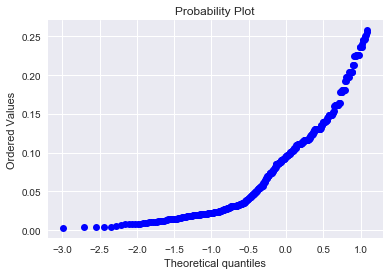

PE_Hand_Mean


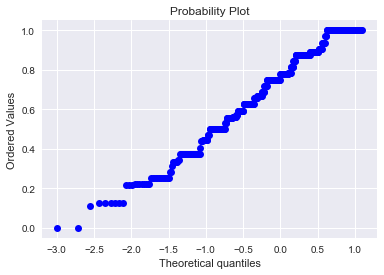

PE_Hand_Variance


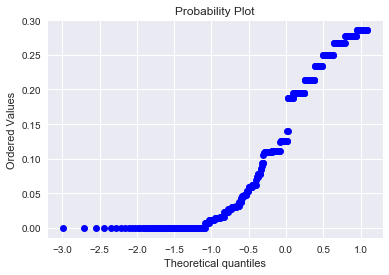

PE_Mod_Mean


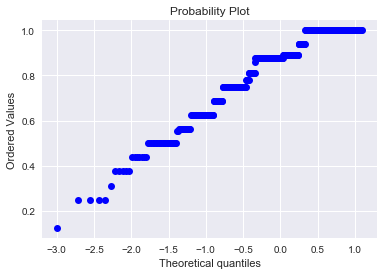

PE_Mod_Variance


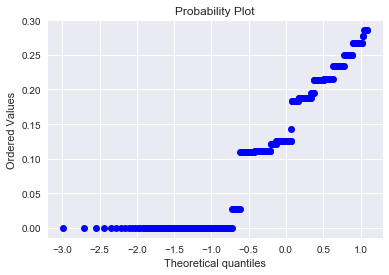

PE_Check_Mean


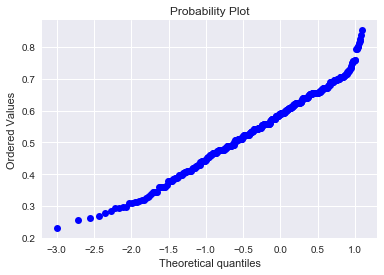

PE_Check_Variance


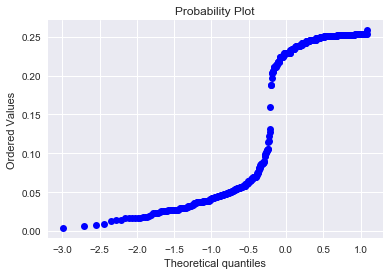

Hx_Mean


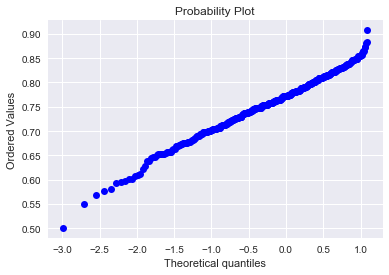

Hx_Variance


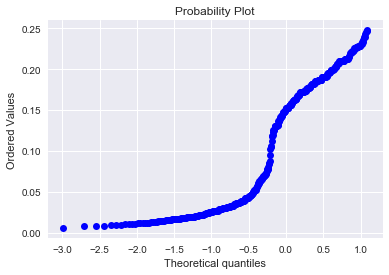

In [91]:
for i in range(len(single_features)):
    print (single_features[i])
    x = single_features[i]
    #sm.qqplot(random_subset[random_subset.columns[i]], line='s')
    stats.probplot(df[x], dist="norm", plot=plt)
    plt.show()

In [ ]:
PersonSatisf_Variance, RecSatisf_Variance, PPI_Init_Variance, PPI_Infor_Variance, 

((array([-2.99209858e+00, -2.71015927e+00, -2.55162541e+00, -2.43921385e+00,
         -2.35113311e+00, -2.27822091e+00, -2.21572267e+00, -2.16084152e+00,
         -2.11178767e+00, -2.06734403e+00, -2.02664403e+00, -1.98904794e+00,
         -1.95406954e+00, -1.92133033e+00, -1.89052965e+00, -1.86142459e+00,
         -1.83381593e+00, -1.80753820e+00, -1.78245240e+00, -1.75844061e+00,
         -1.73540186e+00, -1.71324904e+00, -1.69190643e+00, -1.67130780e+00,
         -1.65139483e+00, -1.63211595e+00, -1.61342528e+00, -1.59528183e+00,
         -1.57764883e+00, -1.56049314e+00, -1.54378481e+00, -1.52749667e+00,
         -1.51160399e+00, -1.49608418e+00, -1.48091659e+00, -1.46608224e+00,
         -1.45156367e+00, -1.43734479e+00, -1.42341071e+00, -1.40974764e+00,
         -1.39634279e+00, -1.38318426e+00, -1.37026095e+00, -1.35756253e+00,
         -1.34507932e+00, -1.33280226e+00, -1.32072287e+00, -1.30883317e+00,
         -1.29712567e+00, -1.28559331e+00, -1.27422944e+00, -1.26302778e+00,

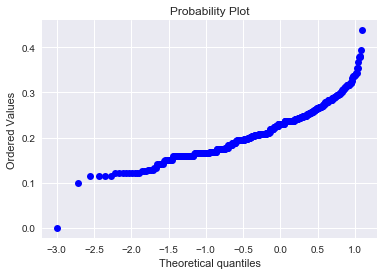

In [94]:
 stats.probplot((df.RecSatisf_Variance)**0.5, dist="norm", plot=plt)

In [108]:
import scipy.special as sc

In [114]:
transformed_data = df 

In [115]:
df

,Student,Year,Result,PersonSatisf_Mean,PersonSatisf_Variance,RecSatisf_Mean,RecSatisf_Variance,PPI_Init_Mean,PPI_Init_Variance,PPI_Infor_Mean,...,PPI_Close_Mean,PPI_Close_Variance,PE_Hand_Mean,PE_Hand_Variance,PE_Mod_Mean,PE_Mod_Variance,PE_Check_Mean,PE_Check_Variance,Hx_Mean,Hx_Variance
220,496168,2010.0,1,0.6875,NaN,0.625000,NaN,0.701977,NaN,0.538571,...,0.628000,NaN,1.000000,NaN,0.750000,NaN,0.688525,NaN,0.781513,NaN
473,997377,2012.0,1,0.7750,NaN,0.725000,NaN,0.842667,NaN,0.777143,...,0.706667,NaN,0.125000,NaN,1.000000,NaN,0.799107,NaN,0.779853,NaN
463,792281,2012.0,1,0.5625,NaN,0.475000,NaN,0.746667,NaN,0.700000,...,0.753333,NaN,0.500000,NaN,0.750000,NaN,0.557093,NaN,0.702491,NaN
144,464314,2009.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728,366800,2014.0,1,0.4750,NaN,0.575000,NaN,0.863000,NaN,0.848571,...,0.803810,NaN,0.750000,NaN,0.875000,NaN,0.523438,NaN,0.600711,NaN
31,934998,2008.0,1,0.9000,NaN,0.891667,NaN,1.000000,NaN,0.971831,...,0.838710,NaN,0.888889,NaN,0.888889,NaN,0.465909,NaN,0.809091,NaN
540,321395,2012.0,1,0.4375,NaN,0.350000,NaN,0.713778,NaN,0.660000,...,0.516667,NaN,0.875000,NaN,0.687500,NaN,0.545139,NaN,0.780965,NaN
748,716257,2014.0,1,0.8000,NaN,0.900000,NaN,0.946000,NaN,0.931429,...,0.871905,NaN,0.562500,NaN,0.875000,NaN,0.596503,NaN,0.725229,NaN
582,374550,2013.0,1,0.7375,NaN,0.775000,NaN,0.917000,NaN,0.891429,...,0.883810,NaN,0.812500,NaN,0.625000,NaN,0.640040,NaN,0.700925,NaN
422,960111,2011.0,1,0.7000,NaN,0.675000,NaN,0.611628,NaN,0.637143,...,0.477000,NaN,0.625000,NaN,1.000000,NaN,0.655738,NaN,0.669492,NaN


In [112]:
for i in range(len(single_features)):
    #print (single_features[i])
    if 'Variance' in single_features[i]:
        name = single_features[i]
        #x = stats.boxcox(transformed_data[name])
        x = sc.boxcox(np.array(transformed_data[name]),3)
        transformed_data.loc[:,name] = pd.Series(x, index = transformed_data.index)
    

In [113]:
transformed_data

,Student,Year,Result,PersonSatisf_Mean,PersonSatisf_Variance,RecSatisf_Mean,RecSatisf_Variance,PPI_Init_Mean,PPI_Init_Variance,PPI_Infor_Mean,...,PPI_Close_Mean,PPI_Close_Variance,PE_Hand_Mean,PE_Hand_Variance,PE_Mod_Mean,PE_Mod_Variance,PE_Check_Mean,PE_Check_Variance,Hx_Mean,Hx_Variance
220,496168,2010.0,1,0.6875,NaN,0.625000,NaN,0.701977,NaN,0.538571,...,0.628000,NaN,1.000000,NaN,0.750000,NaN,0.688525,NaN,0.781513,NaN
473,997377,2012.0,1,0.7750,NaN,0.725000,NaN,0.842667,NaN,0.777143,...,0.706667,NaN,0.125000,NaN,1.000000,NaN,0.799107,NaN,0.779853,NaN
463,792281,2012.0,1,0.5625,NaN,0.475000,NaN,0.746667,NaN,0.700000,...,0.753333,NaN,0.500000,NaN,0.750000,NaN,0.557093,NaN,0.702491,NaN
144,464314,2009.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728,366800,2014.0,1,0.4750,NaN,0.575000,NaN,0.863000,NaN,0.848571,...,0.803810,NaN,0.750000,NaN,0.875000,NaN,0.523438,NaN,0.600711,NaN
31,934998,2008.0,1,0.9000,NaN,0.891667,NaN,1.000000,NaN,0.971831,...,0.838710,NaN,0.888889,NaN,0.888889,NaN,0.465909,NaN,0.809091,NaN
540,321395,2012.0,1,0.4375,NaN,0.350000,NaN,0.713778,NaN,0.660000,...,0.516667,NaN,0.875000,NaN,0.687500,NaN,0.545139,NaN,0.780965,NaN
748,716257,2014.0,1,0.8000,NaN,0.900000,NaN,0.946000,NaN,0.931429,...,0.871905,NaN,0.562500,NaN,0.875000,NaN,0.596503,NaN,0.725229,NaN
582,374550,2013.0,1,0.7375,NaN,0.775000,NaN,0.917000,NaN,0.891429,...,0.883810,NaN,0.812500,NaN,0.625000,NaN,0.640040,NaN,0.700925,NaN
422,960111,2011.0,1,0.7000,NaN,0.675000,NaN,0.611628,NaN,0.637143,...,0.477000,NaN,0.625000,NaN,1.000000,NaN,0.655738,NaN,0.669492,NaN


In [102]:
smf.logit('Result ~ ' + ('+'.join(features)), data=transformed_data).fit().summary()

Optimization terminated successfully.
         Current function value: nan
         Iterations 1


/Users/marika/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/Users/marika/anaconda/lib/python2.7/site-packages/numpy/linalg/linalg.py:1647: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)
/Users/marika/anaconda/lib/python2.7/site-packages/statsmodels/base/optimizer.py:230: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
/Users/marika/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/marika/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/marika/anaconda/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid val

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Result   No. Observations:                  432
Model:                          Logit   Df Residuals:                      432
Method:                           MLE   Df Model:                           -1
Date:                Fri, 04 May 2018   Pseudo R-squ.:                     nan
Time:                        16:16:30   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -43.746
                                        LLR p-value:                       nan
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                    nan        nan        nan        nan         nan         nan
RecSatisf_Variance           nan        nan        nan        nan         nan         nan
PE_Hand_Mean                 nan        nan        nan        nan         nan         nan
PE_Mod_Mean                  nan        nan        nan        nan         nan         nan
PPI_Init_Mean                nan        nan        nan        nan         nan         nan
Hx_Variance                  nan        nan        nan        nan         nan         nan
RecSatisf_Mean               nan        nan        nan        nan         nan         nan
PE_Check_Variance            nan        nan        nan        nan         nan         nan
PersonSatisf_Variance        nan        nan        nan        nan         nan         nan
PE_Hand_Variance             nan        nan        nan        nan         nan         nan
PE_Check_Mean                nan        nan        nan        nan         nan         nan
PersonSatisf_Mean            nan        nan        nan        nan         nan         nan
Hx_Mean                      nan        nan        nan        nan         nan         nan
PPI_Init_Variance            nan        nan        nan        nan         nan         nan
PPI_Close_Variance           nan        nan        nan        nan         nan         nan
PE_Mod_Variance              nan        nan        nan        nan         nan         nan
PPI_Close_Mean               nan        nan        nan        nan         nan         nan
PPI_Infor_Mean               nan        nan        nan        nan         nan         nan
PPI_Infor_Variance           nan        nan        nan        nan         nan         nan
=========================================================================================
"""